# Importing necessary libraries

In [609]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [610]:
# loading the dataset
df = pd.read_csv('titanic.csv')
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# Handling missing values

In [611]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [612]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [613]:
df.fillna({
    'embark_town' : 'Southampton',
    'embarked' : 'S',
    'age' : np.floor(df['age'].mean())
}, inplace=True)

# Univariate, bivariate, trivariate analysis

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [615]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [616]:
df.shape

(891, 15)

In [617]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

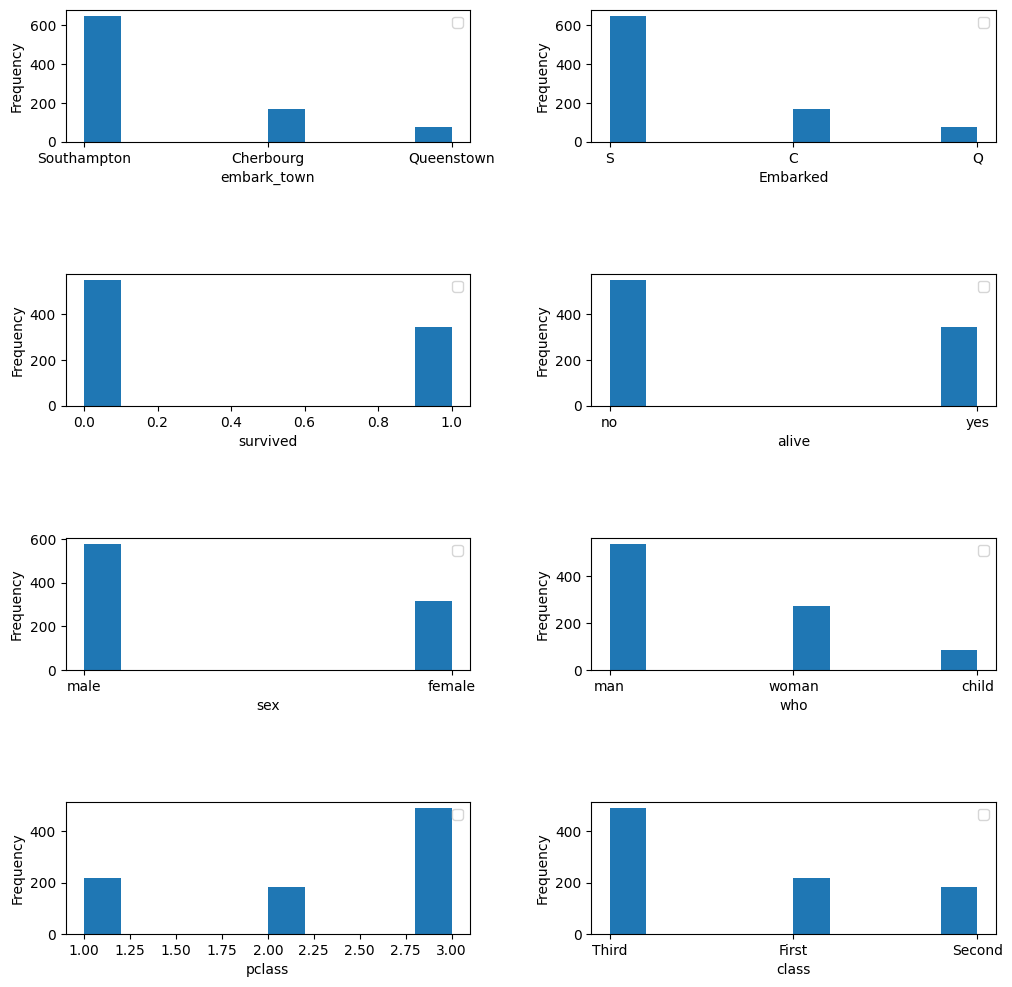

In [618]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize =(12, 12))
ax1.hist(df['embark_town'])
ax1.set_xlabel('embark_town')
ax1.set_ylabel('Frequency')
ax1.legend()

ax2.hist(df['embarked'])
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Frequency')
ax2.legend()

ax3.hist(df['survived'])
ax3.set_xlabel('survived')
ax3.set_ylabel('Frequency')
ax3.legend()

ax4.hist(df['alive'])
ax4.set_xlabel('alive')
ax4.set_ylabel('Frequency')
ax4.legend()

ax5.hist(df['sex'])
ax5.set_xlabel('sex')
ax5.set_ylabel('Frequency')
ax5.legend()

ax6.hist(df['who'])
ax6.set_xlabel('who')
ax6.set_ylabel('Frequency')
ax6.legend()

ax7.hist(df['pclass'])
ax7.set_xlabel('pclass')
ax7.set_ylabel('Frequency')
ax7.legend()

ax8.hist(df['class'])
ax8.set_xlabel('class')
ax8.set_ylabel('Frequency')
ax8.legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=1)  # Adjust the values as needed

embark_town and embarked column, 'survived' and 'alive' columns, 'pclass' and 'class' columns interpret the same data, so we will drop one of each 'adult_male' column does not hold importance when 'sex' and 'who' column are present, so we will drop it 'deck' column mostly holds 'null' values so only way to handle it is to drop it.

In [625]:
df = df.drop(['embarked', 'alive', 'pclass', 'deck', 'adult_male'], axis=1)


Text(0.5, 1.0, 'Age-Fare Scatterplot')

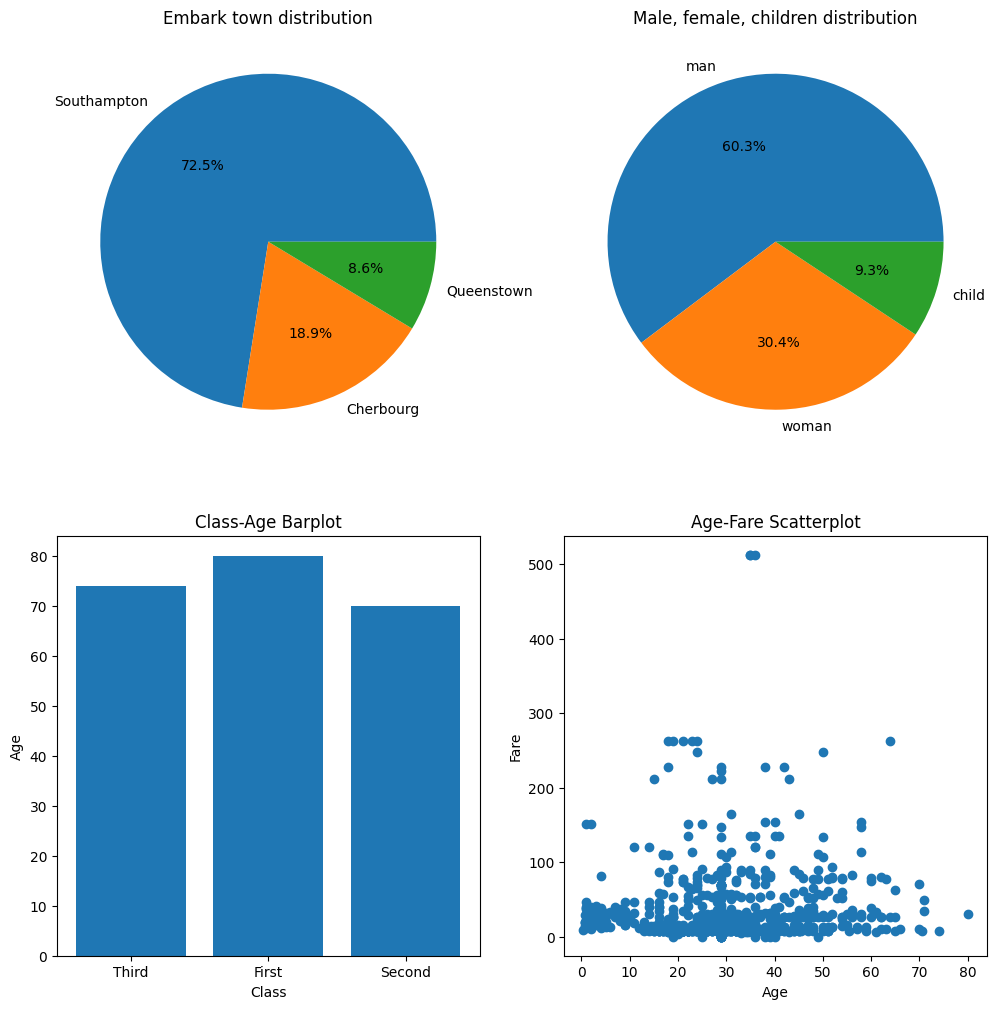

In [619]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize =(12, 12))
ax1.pie(df['embark_town'].value_counts(), labels=df['embark_town'].unique(), autopct='%1.1f%%')
ax1.set_title('Embark town distribution')

ax2.pie(df['who'].value_counts(), labels=df['who'].unique(), autopct='%1.1f%%')
ax2.set_title('Male, female, children distribution')

ax3.bar(df['class'], df['age'])
ax3.set_xlabel("Class")
ax3.set_ylabel("Age")
ax3.set_title("Class-Age Barplot")

ax4.scatter(df['age'], df['fare'])
ax4.set_xlabel("Age")
ax4.set_ylabel("Fare")
ax4.set_title("Age-Fare Scatterplot")

Text(0, 0.5, 'Frequency')

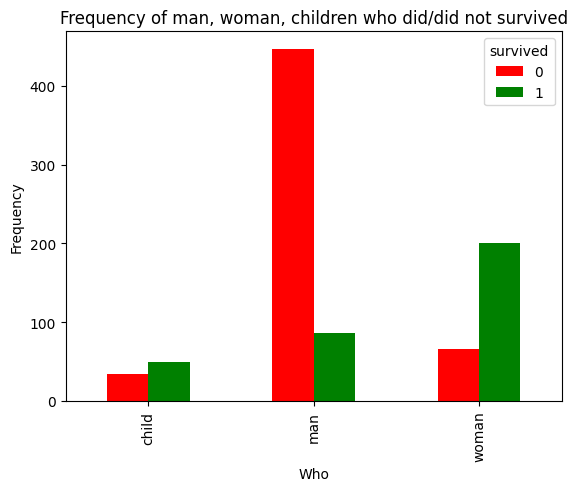

In [622]:
who_group = df.groupby(['who', 'survived']).size().unstack()
who_group.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Frequency of man, woman, children who did/did not survived')
plt.xlabel('Who')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

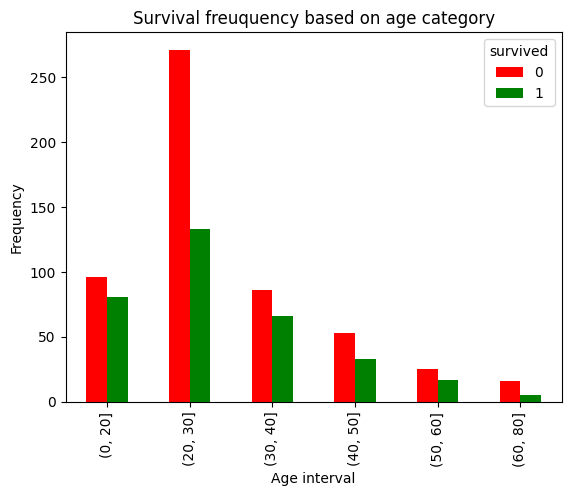

In [623]:
age_interval = [0, 20, 30, 40, 50, 60, 80]
df['age_category'] = pd.cut(df['age'], bins = age_interval)
age_grouped = df.groupby(['age_category', 'survived']).size().unstack()
age_grouped.plot(kind='bar', color=['red', 'green'])
plt.title('Survival freuquency based on age category')
plt.xlabel('Age interval')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

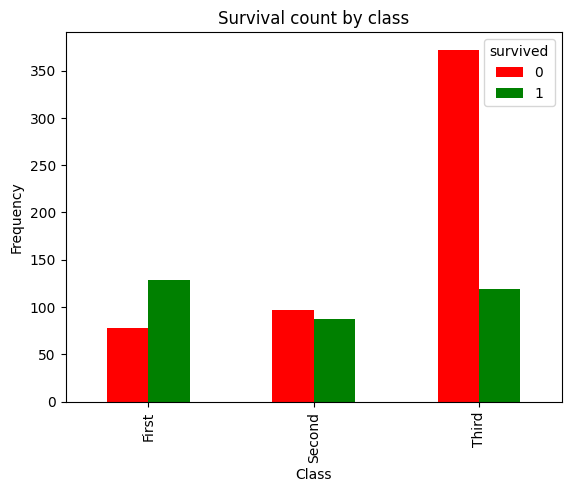

In [624]:
class_group = df.groupby(['class', 'survived']).size().unstack()
class_group.plot(kind='bar', stacked=False, color=['red', 'green'] )
plt.title("Survival count by class")
plt.xlabel("Class")
plt.ylabel('Frequency')


# Outlier detection

Text(0.5, 1.0, 'Fare boxplot')

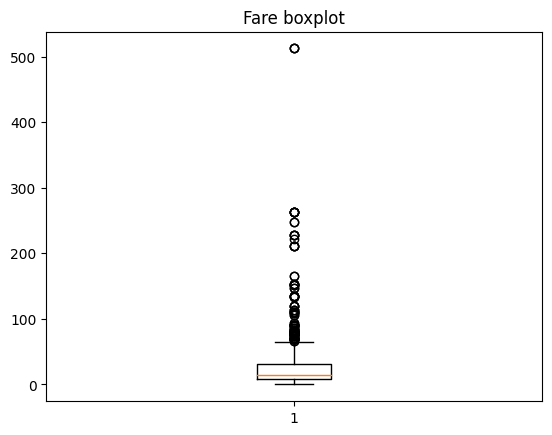

In [620]:
plt.boxplot(df['fare'])
plt.title('Fare boxplot')


In [621]:
per99 = df['fare'].quantile(.99)
df= df[df['fare'] < per99]
print("Per 99: ", per99)

Per 99:  249.00622000000035


# Categorical encoding


In [627]:
sex_dict = {value:key for key,value in enumerate(df['sex'].unique())}
class_dict = {'First': 1, 'Second': 2, 'Third': 3}
who_dict = {value:key for key,value in enumerate(df['who'].unique())}
embark_town_dict = {value:key for key,value in enumerate(df['embark_town'].unique())}
alone_dict = {value:key for key,value in enumerate(df['alone'].unique())}

In [628]:
df = df.replace({
    'sex': sex_dict,
    'class': class_dict,
    "who": who_dict,
    'embark_town': embark_town_dict,
    'alone': alone_dict
})
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,alone,age_category
0,0,0,22.0,1,0,7.2500,3,0,0,0,"(20, 30]"
1,1,1,38.0,1,0,71.2833,1,1,1,0,"(30, 40]"
2,1,1,26.0,0,0,7.9250,3,1,0,1,"(20, 30]"
3,1,1,35.0,1,0,53.1000,1,1,0,0,"(30, 40]"
4,0,0,35.0,0,0,8.0500,3,0,0,1,"(30, 40]"


# Feature scaling

In [629]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
df['fare'] = scaler.fit_transform(df[['fare']])

# Train test split

In [630]:
X = df[['sex', 'age', 'fare', 'class', 'who', 'embark_town']]
y = df['survived']

In [631]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [632]:
X_train.shape

(617, 6)

In [633]:
X_test.shape

(265, 6)

In [634]:
y_train.shape

(617,)

In [635]:
y_test.shape

(265,)